### 导入包

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 读取数据
- 设置日期为行索引

In [2]:
df = pd.read_csv('贵州茅台.csv', index_col='日期', parse_dates=True,
                 usecols=['日期', '收盘价', '最高价', '最低价', '开盘价'])
df.sort_index(ascending=True, inplace=True)
df.head()

,收盘价,最高价,最低价,开盘价
日期,,,,
2001-08-27,35.55,37.78,32.85,34.51
2001-08-28,36.86,37.00,34.61,34.99
2001-08-29,36.38,37.00,36.10,36.98
2001-08-30,37.10,37.51,36.00,36.28
2001-08-31,37.01,37.62,36.80,37.15


### 年度涨跌幅
- (当年的收盘价-去年的收盘价)/去年的收盘价*100，得出年度涨跌幅
- Series.shirft(1)方法，使该列数据整体下移，默认下移1位（上移1位用-1表示）

In [3]:
stock_year = df.resample('Y').last()
stock_year['年度涨跌幅'] = (
    stock_year['收盘价']-stock_year['收盘价'].shift())/stock_year['收盘价'].shift()*100
stock_year.head()

,收盘价,最高价,最低价,开盘价,年度涨跌幅
日期,,,,,
2001-12-31,38.55,39.30,37.46,37.67,NaN
2002-12-31,25.46,25.78,25.45,25.60,-33.955901
2003-12-31,25.40,25.50,25.23,25.50,-0.235664
2004-12-31,36.64,37.70,36.08,36.70,44.251969
2005-12-31,45.62,46.52,44.90,46.50,24.508734


### 按照日期区间取值

In [4]:
stock_year.loc['2010-01-01':'2021-12-31']

,收盘价,最高价,最低价,开盘价,年度涨跌幅
日期,,,,,
2010-12-31,183.92,184.28,181.05,181.80,8.302909
2011-12-31,193.30,194.88,190.00,192.70,5.100043
2012-12-31,209.02,214.80,206.35,213.31,8.132437
2013-12-31,128.38,129.31,122.50,124.00,-38.580040
2014-12-31,189.62,190.00,185.00,185.60,47.702134
2015-12-31,218.19,219.50,217.82,218.22,15.066976
2016-12-31,334.15,335.29,326.61,326.61,53.146340
2017-12-31,697.49,726.50,691.60,718.00,108.735598
2018-12-31,590.01,596.40,560.00,563.30,-15.409540


### 取出股票5天和20天均价，并绘图

In [5]:
stock = df.loc['2020-01-01':'2021-09-30']
stock

,收盘价,最高价,最低价,开盘价
日期,,,,
2020-01-02,1130.00,1145.06,1116.00,1128.00
2020-01-03,1078.56,1117.00,1076.90,1117.00
2020-01-06,1077.99,1092.90,1067.30,1070.86
2020-01-07,1094.53,1099.00,1076.40,1077.50
2020-01-08,1088.14,1095.50,1082.58,1085.05
...,...,...,...,...
2021-09-24,1694.00,1719.98,1628.00,1628.00
2021-09-27,1855.00,1863.40,1750.00,1750.00
2021-09-28,1822.06,1860.00,1795.00,1848.00


- 设置画布大小为200*50

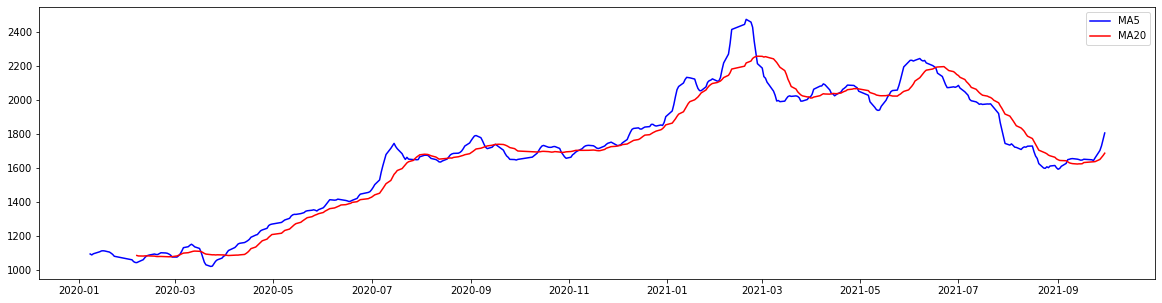

In [6]:
ma5 = stock.收盘价.rolling(5).mean()
ma20 = stock.收盘价.rolling(20).mean()
plt.figure(figsize=(20, 5))
plt.plot(ma5, c='blue', label='MA5')
plt.plot(ma20, c='red', label='MA20')
plt.legend()

### 股票收益案例
- 截取2010年至今的股票历史行情
- 每年每月第一个交易日按收盘价买入一手
- 每年最后一个交易日按收盘价卖出全部当年股票
- 今年的股票未满一年，只能买，不能卖

In [7]:
new = df['2010':'2021']
new

,收盘价,最高价,最低价,开盘价
日期,,,,
2010-01-04,169.94,172.00,169.31,172.00
2010-01-05,169.44,171.50,169.00,170.99
2010-01-06,166.76,169.50,166.31,168.99
2010-01-07,163.72,167.19,161.88,166.76
2010-01-08,162.00,164.00,160.10,164.00
...,...,...,...,...
2021-09-24,1694.00,1719.98,1628.00,1628.00
2021-09-27,1855.00,1863.40,1750.00,1750.00
2021-09-28,1822.06,1860.00,1795.00,1848.00


In [8]:
# 重新采样：每年每月首个交易日的收盘价
cost_money = new.resample('M').first()['收盘价'].sum()*100
print(f'买入成本：{round(cost_money,2)}')

# 重新采样：每年最后一天的收盘价，但不包括最近不满的一年
sell_money = new.resample('Y').last()['收盘价'][:-1].sum()*1200
print(f'卖出收益：{round(sell_money,2)}')

# 最近不足年的9个月，共9手需要计算在总收益中
hand_values = new['收盘价'][-1]*900
print(f'留存价值：{round(hand_values,2)}')

# 卖出的收益+没有卖出的收益-成本
summary = sell_money+hand_values-cost_money
summary

买入成本：7651421.0
卖出收益：7110096.0
留存价值：1647000.0


1105675.000000001